<a href="https://colab.research.google.com/github/shafilahamed/Capstone-3-Coronavirus-Tweet-Sentiment-Analysis/blob/main/INDIVIDUAL_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
twitter_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE 3(coronavirus sentiment analysis) SHAFIL AHAMED/Copy of Coronavirus Tweets.csv',encoding="ISO-8859-1")

In [ ]:
twitter_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


DATA PREPROCESSING


In [ ]:
twitter_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

sentiment column has 5 different values

In [ ]:
tw_df=twitter_df[['OriginalTweet','Sentiment']]

for model building we will need only two columns other columns are irrelevant


In [ ]:
tw_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
ps=PorterStemmer()
lem=WordNetLemmatizer()

In [ ]:
corpus=[]
for i in range(0,len(twitter_df)):
  review=re.sub('[^a-zA-Z]'," ",tw_df['OriginalTweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review=" ".join(review)
  corpus.append(review)

In [ ]:
corpus[1:10]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak http co binca vp p',
 'food stock one empti pleas panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener http co zrlg z j',
 'readi go supermarket covid outbreak paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin http co usmualq n',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report http co cfxch lu',
 'cashier groceri store share insight covid prove credibl comment civic class know talk http co iefdnehgdo',
 'supermarket today buy toilet paper rebel toiletpaper

We use portstemmer for the stemming process,then we make a for loop for data preprocessing and we get a corpus with all the test messages

##DATA VISUALISATION

Word cloud representation of all the texts present in the tweet columns

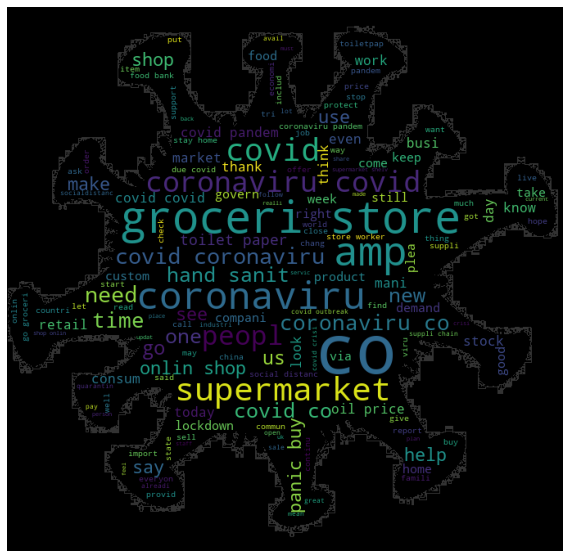

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://res.cloudinary.com/maxie/image/upload/v1617197755/TEMP/covid_ywd7ph.jpg")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "black", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS),contour_width=1, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=create_word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [ ]:
tw_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

Here we plot the sentiment counts of all the unique sentiments using a countplot

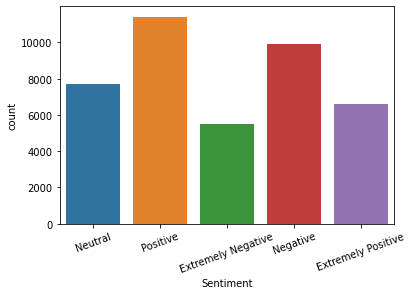

In [ ]:
plot = sns.countplot(x='Sentiment', data=tw_df).set_xticklabels(labels=['Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'],rotation=20)

We map these sentiment into 3 values for better results

In [ ]:
sentiment_map = {"Extremely Negative":-1, "Negative":-1,"Neutral":0, "Positive":1,"Extremely Positive":1}
tw_df['Sentiment'] = tw_df['Sentiment'].map(sentiment_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#These are the count plot of sentiments after processing

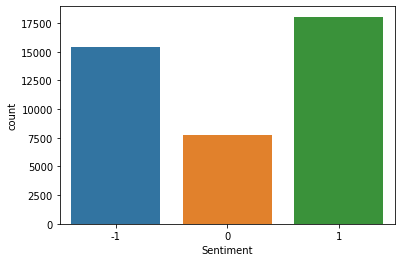

In [ ]:
sns.countplot(x='Sentiment', data=tw_df)

In [ ]:
tw_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",-1
...,...,...
41152,Airline pilots offering to stock supermarket s...,0
41153,Response to complaint not provided citing COVI...,-1
41154,You know itÂs getting tough when @KameronWild...,1
41155,Is it wrong that the smell of hand sanitizer i...,0


##MODEL TRAINING


We will be using tf-idf method for vectorising the text,then we train 4 models namely Multinomial Naive Bayes,Logistic Regression,Random Forest,Stochastic Gradient Descent,SVM.We find that the stochastic gradient descent has the best accuracy score and thus we choose it for model building.

In [ ]:
tf=TfidfVectorizer(max_features=5000)
X=tf.fit_transform(corpus).toarray()


In [ ]:
y=tw_df['Sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 0,stratify =y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32925, 5000), (8232, 5000), (32925,), (8232,))

In [ ]:
mlb = MultinomialNB()
mlb.fit(X_train,y_train)
y_pred=mlb.predict(X_test)
cross_val_score(mlb,X,y,cv=10,scoring='accuracy').mean()

0.6681005163738816

In [ ]:
 from sklearn.pipeline import make_pipeline
 from sklearn.preprocessing import StandardScaler
 pipe = make_pipeline(StandardScaler(), LogisticRegression())
 pipe.fit(X_train, y_train)
 y_pred_log=pipe.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
accuracy_log=accuracy_score(y_test,y_pred_log)
accuracy_log

0.7476919339164237

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf=accuracy_score(y_test,Y_pred_rf)
accuracy_rf

0.7337220602526725

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(X_train,y_train)
y_pred_pac=pac.predict(X_test)



In [ ]:
accuracy_pac=accuracy_score(y_test,y_pred_pac)
accuracy_pac

0.7791545189504373

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )


Training accuracy Score    :  0.8404859529233105
Validation accuracy Score :  0.7813411078717201
